<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_NeuralNetworks_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

## Get the data

In [12]:
X_train, y_train = make_circles(100)

In [13]:
X_train.shape, y_train.shape

((100, 2), (100,))

## Visualize the data

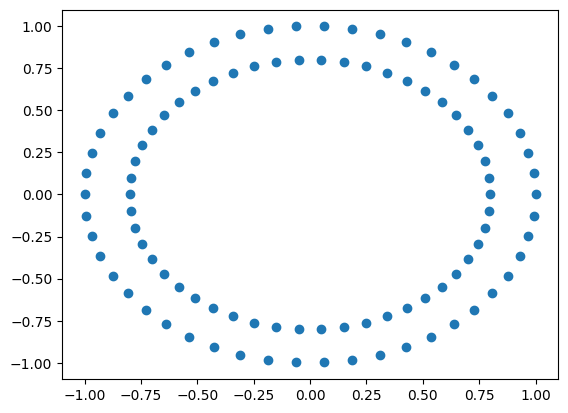

In [15]:
plt.scatter(X_train[:,0], X_train[:,1])

## Create a model to fit the data

In [31]:
tf.random.set_seed(42)

# Create a model
moon_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile a model
moon_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics="accuracy")

# Fit a model
history = moon_model.fit(X_train, y_train, epochs=150)

Epoch 1/150
4/4 [==============================] - 3s 6ms/step - loss: 0.6970 - accuracy: 0.5100
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5200
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5300
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 11/150
4/4 [===========

In [32]:
def plot_decision_boundary(model, X, y):
  """ Plot decision boundary created by model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Doing binary classification


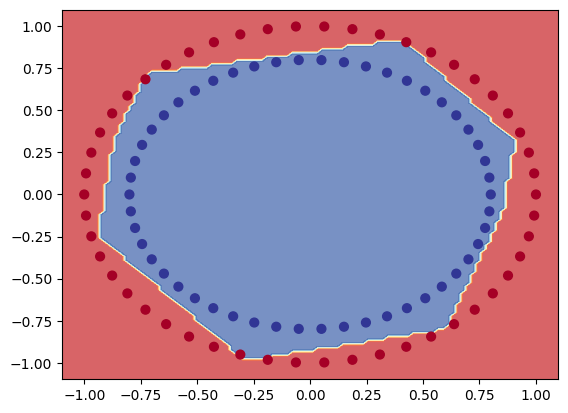

In [33]:
plot_decision_boundary(model=moon_model, X=X_train, y=y_train)

Text(0.5, 0, 'epochs')

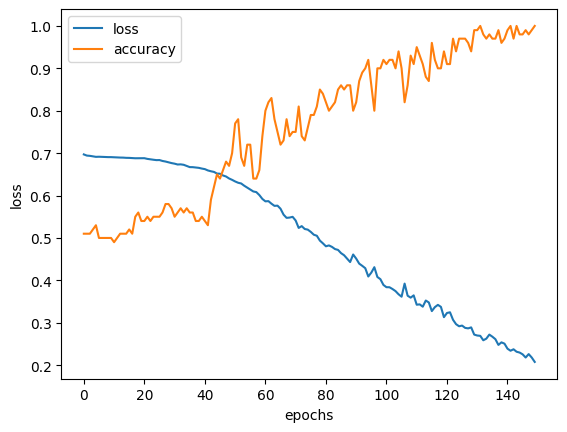

In [34]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")